<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DS-SF-42 | Class 8 | Regression - Addressing model fit

<br>
### _Predicting shots made per game by Kobe Bryant_

_Authors: Kiefer Katovich (SF) and Gus Ostow (SF)_

---

The Kobe shots dataset has hundreds of columns representing different characteristics of each basketball game. Fitting an ordinary linear regression will cause issues that other datasets might not. In this exploration you will be diagnose issues with model fit using regression metrics, train/test split, and cross validation.


### Plan

Today I am going to flip the script: we are going to start the class with a hands-on partner activity to motivate the day's topic, then address the theory after.

1. Motivating the problem
3. Slides interlude
2. Addressing the problem

### Teams

<img src=https://i.imgur.com/JI6ydY5.png align=left>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>


# <font color=blue>Part I</font> - Motifivating the problem


---

### 1. Load packages and data

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
kobe = pd.read_csv('./datasets/kobe_superwide_games.csv')

---

### 2. Examine the data

#### Guiding questions

- How many columns are there? 
- Examine what the observations (rows) and columns represent.
- Why does this dataset _feel_ different than the datasets we've touched so far?
- What concerns do you have even before fitting your first model?

In [3]:
# A:
kobe.head()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


In [4]:
kobe.shape

(1558, 645)

In [10]:
kobe.columns

Index([u'SHOTS_MADE', u'AWAY_GAME', u'SEASON_OPPONENT:atl:1996-97',
       u'SEASON_OPPONENT:atl:1997-98', u'SEASON_OPPONENT:atl:1999-00',
       u'SEASON_OPPONENT:atl:2000-01', u'SEASON_OPPONENT:atl:2001-02',
       u'SEASON_OPPONENT:atl:2002-03', u'SEASON_OPPONENT:atl:2003-04',
       u'SEASON_OPPONENT:atl:2004-05',
       ...
       u'ACTION_TYPE:tip_layup_shot', u'ACTION_TYPE:tip_shot',
       u'ACTION_TYPE:turnaround_bank_shot',
       u'ACTION_TYPE:turnaround_fadeaway_bank_jump_shot',
       u'ACTION_TYPE:turnaround_fadeaway_shot',
       u'ACTION_TYPE:turnaround_finger_roll_shot',
       u'ACTION_TYPE:turnaround_hook_shot',
       u'ACTION_TYPE:turnaround_jump_shot', u'SEASON_GAME_NUMBER',
       u'CAREER_GAME_NUMBER'],
      dtype='object', length=645)

In [12]:
kobe.describe()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,...,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,7.358793,0.500642,0.001284,0.001284,0.000642,0.000642,0.001284,0.001284,0.000642,0.000642,...,0.000064,0.006207,0.002047,0.000032,0.014149,0.000050,0.000433,0.031766,42.946727,780.486521
std,3.471180,0.500160,0.035817,0.035817,0.025335,0.025335,0.035817,0.035817,0.025335,0.025335,...,0.001791,0.022033,0.011133,0.001267,0.041313,0.001390,0.004902,0.049402,26.048206,449.923227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,391.250000
50%,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,780.500000
75%,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,63.000000,1169.750000
max,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.050000,0.250000,0.133333,0.050000,0.533333,0.041667,0.111111,0.352941,105.000000,1559.000000


In [21]:
kobe.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
SHOTS_MADE,0.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,4.0,0.0,...,5.000000,0.000000,1.000000,5.000000,1.000000,4.000000,4.0,9.000000,3.000000,19.00
AWAY_GAME,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.00
SEASON_OPPONENT:atl:1996-97,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00
SEASON_OPPONENT:atl:1997-98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00
SEASON_OPPONENT:atl:1999-00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00
SEASON_OPPONENT:atl:2000-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00
SEASON_OPPONENT:atl:2001-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00
SEASON_OPPONENT:atl:2002-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00
SEASON_OPPONENT:atl:2003-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00
SEASON_OPPONENT:atl:2004-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00


In [75]:
kobe["AWAY_GAME"].unique()

array([0, 1])

In [19]:
kobe.head()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


In [76]:
for col in kobe.columns:
    print col

SHOTS_MADE
AWAY_GAME
SEASON_OPPONENT:atl:1996-97
SEASON_OPPONENT:atl:1997-98
SEASON_OPPONENT:atl:1999-00
SEASON_OPPONENT:atl:2000-01
SEASON_OPPONENT:atl:2001-02
SEASON_OPPONENT:atl:2002-03
SEASON_OPPONENT:atl:2003-04
SEASON_OPPONENT:atl:2004-05
SEASON_OPPONENT:atl:2005-06
SEASON_OPPONENT:atl:2006-07
SEASON_OPPONENT:atl:2007-08
SEASON_OPPONENT:atl:2008-09
SEASON_OPPONENT:atl:2009-10
SEASON_OPPONENT:atl:2010-11
SEASON_OPPONENT:atl:2011-12
SEASON_OPPONENT:atl:2012-13
SEASON_OPPONENT:atl:2013-14
SEASON_OPPONENT:atl:2014-15
SEASON_OPPONENT:atl:2015-16
SEASON_OPPONENT:bkn:2012-13
SEASON_OPPONENT:bkn:2015-16
SEASON_OPPONENT:bos:1996-97
SEASON_OPPONENT:bos:1997-98
SEASON_OPPONENT:bos:1999-00
SEASON_OPPONENT:bos:2001-02
SEASON_OPPONENT:bos:2002-03
SEASON_OPPONENT:bos:2003-04
SEASON_OPPONENT:bos:2004-05
SEASON_OPPONENT:bos:2005-06
SEASON_OPPONENT:bos:2006-07
SEASON_OPPONENT:bos:2007-08
SEASON_OPPONENT:bos:2008-09
SEASON_OPPONENT:bos:2009-10
SEASON_OPPONENT:bos:2010-11
SEASON_OPPONENT:bos:2011-12

In [82]:
kobe.filter(like = 'SEASON_OPPONENT').iloc[0,:]
#but we want to find the one that has one, so need to do a mask
kobe.filter(like = 'SEASON_OPPONENT').iloc[0, ].astype(bool)
#or
kobe.filter(like = 'SEASON_OPPONENT').iloc[0, ] > 0

SEASON_OPPONENT:atl:1996-97    False
SEASON_OPPONENT:atl:1997-98    False
SEASON_OPPONENT:atl:1999-00    False
SEASON_OPPONENT:atl:2000-01    False
SEASON_OPPONENT:atl:2001-02    False
SEASON_OPPONENT:atl:2002-03    False
SEASON_OPPONENT:atl:2003-04    False
SEASON_OPPONENT:atl:2004-05    False
SEASON_OPPONENT:atl:2005-06    False
SEASON_OPPONENT:atl:2006-07    False
SEASON_OPPONENT:atl:2007-08    False
SEASON_OPPONENT:atl:2008-09    False
SEASON_OPPONENT:atl:2009-10    False
SEASON_OPPONENT:atl:2010-11    False
SEASON_OPPONENT:atl:2011-12    False
SEASON_OPPONENT:atl:2012-13    False
SEASON_OPPONENT:atl:2013-14    False
SEASON_OPPONENT:atl:2014-15    False
SEASON_OPPONENT:atl:2015-16    False
SEASON_OPPONENT:bkn:2012-13    False
SEASON_OPPONENT:bkn:2015-16    False
SEASON_OPPONENT:bos:1996-97    False
SEASON_OPPONENT:bos:1997-98    False
SEASON_OPPONENT:bos:1999-00    False
SEASON_OPPONENT:bos:2001-02    False
SEASON_OPPONENT:bos:2002-03    False
SEASON_OPPONENT:bos:2003-04    False
S

In [77]:
kobe["MONTH"].unique()

array([11, 12,  1,  2,  3,  4,  5, 10,  6])

In [78]:
kobe["PLAYOFFS"].unique()

array([0, 1])

In [24]:
atl_96_97 = kobe['SEASON_OPPONENT:atl:1996-97'] ==  1
kobe[atl_96_97]

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
43,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,45


In [26]:
bos_03_04 = kobe['SEASON_OPPONENT:bos:2003-04'] ==  1
kobe[bos_03_04]

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
612,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,27,614
631,4.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.062500,0.0,0.0,0.0,0.0,0.0,0.0,46,633


---

### 3.  Prepare the dataset for training AND validation

- Make predictor matrix `X` and target variable `y`
- Split your data into a validation set using `train_test_split`

In [38]:
from sklearn.model_selection import train_test_split

In [83]:
#A: drop the columns that are 
kobe2 = kobe.drop('SHOTS_MADE',1)
kobe2 = kobe2.drop('SEASON_GAME_NUMBER',1)
kobe2 = kobe2.drop('CAREER_GAME_NUMBER',1)
kobe2 = kobe2.drop('MONTH',1)
kobe2 = kobe2.drop('PERIOD',1)

In [84]:
kobe2.head()

,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,SEASON_OPPONENT:atl:2005-06,...,ACTION_TYPE:slam_dunk_shot,ACTION_TYPE:step_back_jump_shot,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
# A:
y = kobe["SHOTS_MADE"]
x = kobe2

#check if row counts match!
print "check:", x.shape[0] == y.shape[0]

lm = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y)

print "x_train shape:", x_train.shape
print "y_train shape:", y_train.shape

model = lm.fit(x_train, y_train)

#predictions and score
predictions =  model.predict(x_test)
score = model.score(x_test, y_test)
print "score", score
print "coefficient", model.coef_
print "intercept", model.intercept_

check: True
x_train shape: (1168, 640)
y_train shape: (1168,)
score -2.96482324848e+16
coefficient [ -2.99173325e-01   5.52959075e+09  -1.99865402e+08   5.61358176e+08
   1.02290862e+09  -3.30330846e+08  -4.35360764e+08  -2.02819791e+07
  -1.72210466e+08  -1.34278510e+07   1.02047642e+07   4.73242150e+07
   2.96489050e+07   1.31937210e+08   1.63220857e+08   2.31995289e+09
   1.47365607e+07  -1.96779550e+08  -1.12141956e+07   9.51327525e+07
   1.47365609e+07   9.51327500e+07   5.52959075e+09   3.50995085e+08
   5.61358176e+08  -3.30330851e+08  -4.35360767e+08  -2.02819822e+07
  -1.72210466e+08  -1.34278510e+07   1.02047640e+07   4.73242159e+07
   2.96489066e+07   1.31937207e+08   1.63220860e+08   5.39282609e+07
   1.47365576e+07  -1.12142008e+07   9.51327468e+07   5.52959075e+09
   1.78293880e+07  -3.56655342e+07   5.61358175e+08   1.02290862e+09
  -3.30330850e+08  -1.72210465e+08  -1.34278475e+07   1.02047628e+07
   4.73242166e+07   2.96489076e+07   1.31937207e+08   1.63220858e+08
   5

---

### 4. Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

1. How does it perform? Keep the regression metrics we talked about on Tuesday in mind, like mean squared error, mean absolute error, and $R^2$
2. Is there a disparity between your train set and your test set? What does that indicate?

In [86]:
# A:
from sklearn.metrics import mean_squared_error
y_pred = lm.predict(x_test)

print "R squared:", lm.score(x_test, y_test)
print "R squared for training data:", lm.score(x_train, y_train)
print "mean squared error: ", mean_squared_error(y_test, y_pred)

R squared: -1.08379967659e+13
R squared for training data: 0.83634691227
mean squared error:  1.32748073983e+14


In [91]:
# every time we rerun, we get different R Squared. 
# because train_test_split is random
# R suqare is low (or very volatile), but the R square for training data is high --> overfitting

### What's causing this

- too many predictor columns
- too few rows compared to columns
- potential multi-colinearity

# <font color=blue> Interlude</font> - Slides

Sit back and enjoy the show...

----
# <font color=blue> Part II</font> - Addressing the problem

---

### 6. Try fitting ealuating a  `Ridge` model instead of a standard `LinearRegression`
The ridge regression is a model _similar_ to the standard linear regression, but for now let it remain shrouded in an \*air\* of mystery.

Is it better than the Linear regression? On the training set? On the test set? Why do you think that is?

In [105]:
kobe3 = kobe.drop("SHOTS_MADE", axis = 1)
y = kobe["SHOTS_MADE"]
x = kobe3

In [113]:
lm2 = Ridge()

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y)

model = lm2.fit(x_train2, y_train2)

#predictions and score
y_pred2 = lm2.predict(x_test2)

print y_pred2.shape
print y_test2.shape

print "R squared:", lm2.score(x_test2, y_test2)
print "R squared for training data:", lm2.score(x_train2, y_train2)
print "mean squared error: ", mean_squared_error(y_test2, y_pred2)


(390,)
(390,)
R squared: 0.583815806806
R squared for training data: 0.811273444657
mean squared error:  4.90763798638


---
### 7. Examine your ridge model's coefficients

Does anything jump out at you? Use any the tools we've learned so far like histograms, barplots, and other descriptive statistics to compare the ridge model's fit to the linear regression we used earlier.


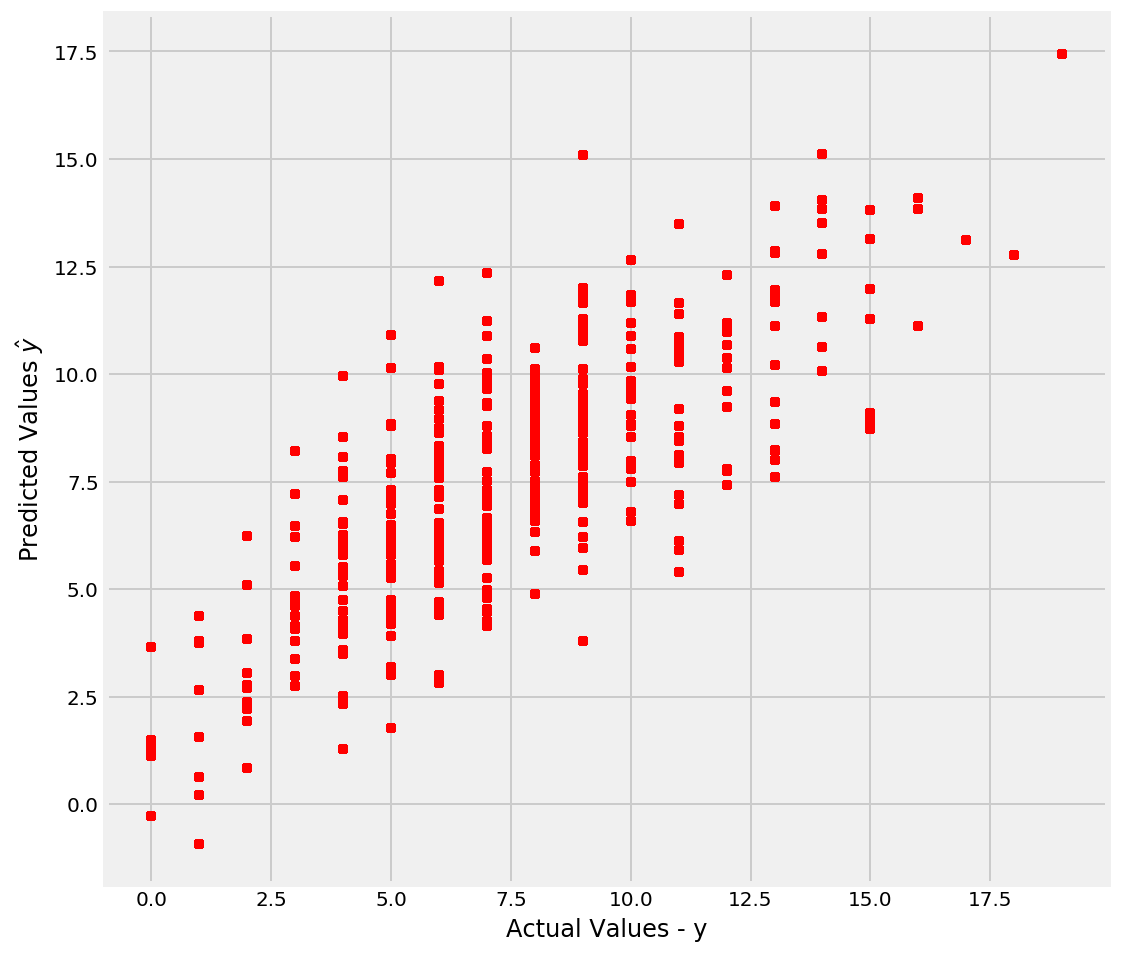

In [123]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(y_test2, y_pred2, s=30, c='r', marker='+', zorder=10)
plt.ylabel("Predicted Values $\hat{y}$")
plt.xlabel("Actual Values - y")
plt.show()

---

### 8. Play around with the `alpha` hyper parameter

How does this impact the coefficients of the fit model?

#### EX:
```python
ridge = Ridge(alpha = 10.0)
```

Some good values to try might be `0`, `0.1`, `1.0`, `10`, `100`

In [124]:
# A:
lm2 = Ridge(alpha = 10.0)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y)

model = lm2.fit(x_train2, y_train2)

#predictions and score
y_pred2 = lm2.predict(x_test2)

print y_pred2.shape
print y_test2.shape

print "R squared:", lm2.score(x_test2, y_test2)
print "R squared for training data:", lm2.score(x_train2, y_train2)
print "mean squared error: ", mean_squared_error(y_test2, y_pred2)

(390,)
(390,)
R squared: 0.608027988273
R squared for training data: 0.734365726103
mean squared error:  4.70475939453


---

### 9. Fit a `Lasso` model and examine it's coefficients

Is it better than the Linear regression? Is it better than Ridge? What do the differences in results imply about the issues with the dataset?

- Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
- What percent of the variables in the original dataset are "zeroed-out" by the lasso?
- What are the most important predictors for how many shots Kobe made in a game?

In [125]:
lm3 = Lasso()

x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y)

model = lm3.fit(x_train3, y_train3)

#predictions and score
y_pred3 = lm3.predict(x_test3)

print y_pred3.shape
print y_test3.shape

#predictions and score
predictions =  model.predict(x_test3)
score = model.score(x_test3, y_test3)
print "score", score
print "coefficient", model.coef_
print "intercept", model.intercept_

print "R squared:", lm3.score(x_test3, y_test3)
print "R squared for training data:", lm3.score(x_train3, y_train3)
print "mean squared error: ", mean_squared_error(y_test3, y_pred3)

(390,)
(390,)
score 0.571227579233
coefficient [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.

In [131]:
len(model.coef_)

644

In [159]:
df = pd.DataFrame(dict(zip(x_test3.columns, model.coef_)), index=[0])
df_t = df.transpose()
df_t

,0
ACTION_TYPE:alley_oop_dunk_shot,0.000000
ACTION_TYPE:alley_oop_layup_shot,0.000000
ACTION_TYPE:cutting_finger_roll_layup_shot,-0.000000
ACTION_TYPE:cutting_layup_shot,-0.000000
ACTION_TYPE:driving_bank_shot,-0.000000
ACTION_TYPE:driving_dunk_shot,0.000000
ACTION_TYPE:driving_finger_roll_layup_shot,0.000000
ACTION_TYPE:driving_finger_roll_shot,0.000000
ACTION_TYPE:driving_floating_bank_jump_shot,0.000000
ACTION_TYPE:driving_floating_jump_shot,-0.000000


---

### 10. Tune the alpha for your `Lasso` model

How does this influence the coefficients? The model performance on the train and the test sets?

In [9]:
# A:

---

### 11. Synthesize what you've discovered

Write a couple of sentences telling the story: 
- How did a standard linear regression perform on the Kobe dataset? What qualities of this dataset caused these results>
- How did a Ridge perform in comparison? What clues could you glean from its coefficients? How does `alpha` seem to dictate the coefficients?
- What about the the `Lasso`?
- When will be useful?

In [10]:
# A: